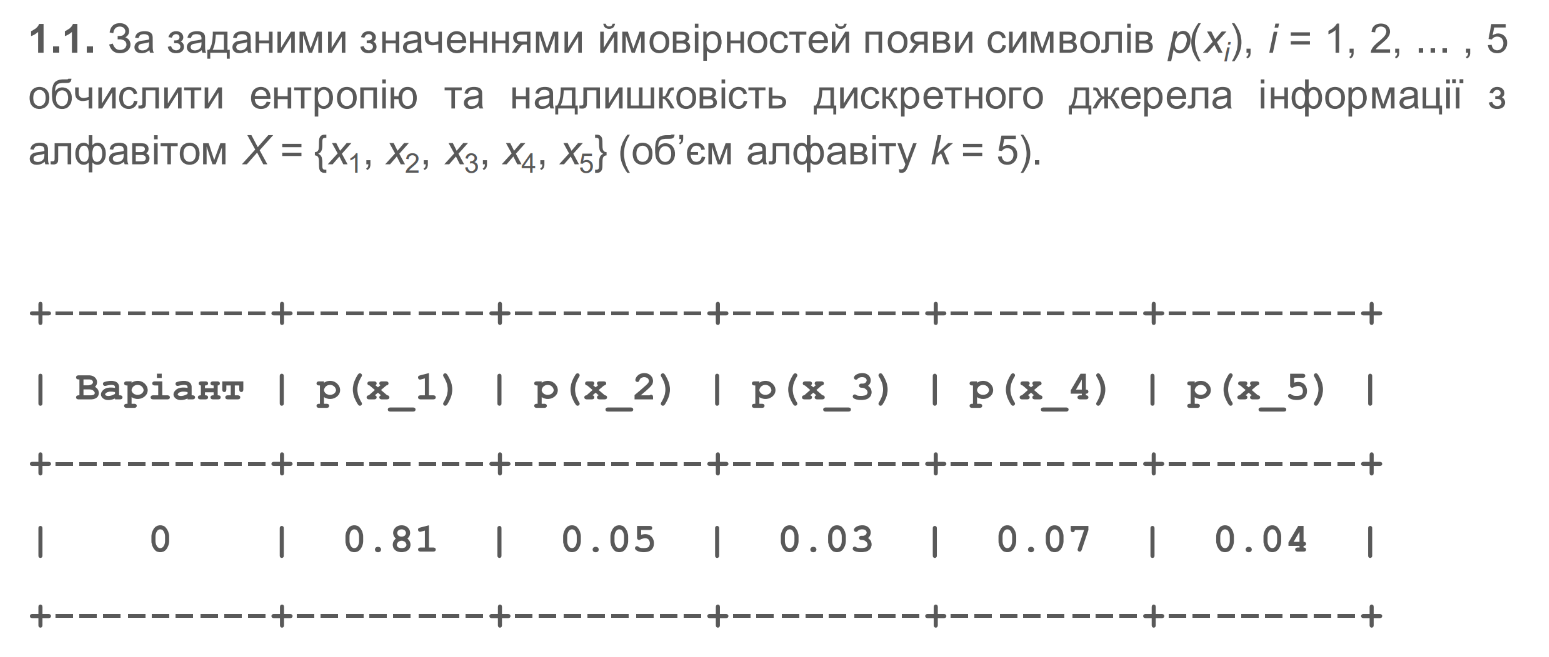

In [ ]:
import math
import pandas as pd
def H(x:list) -> float:
  return round(-sum([i*math.log2(i) for i in x]),4)


check_H = [0.54,0.01,0.09,0.1,0.26] #HERE
print(f' H(x) = {H(check_H)}')

def p(x): #Надлишковість
  return round(1 - H(x)/math.log2(len(x)),4)

print(f' p(x) = {p(check_H)}')

 H(x) = 1.6966
 p(x) = 0.2693


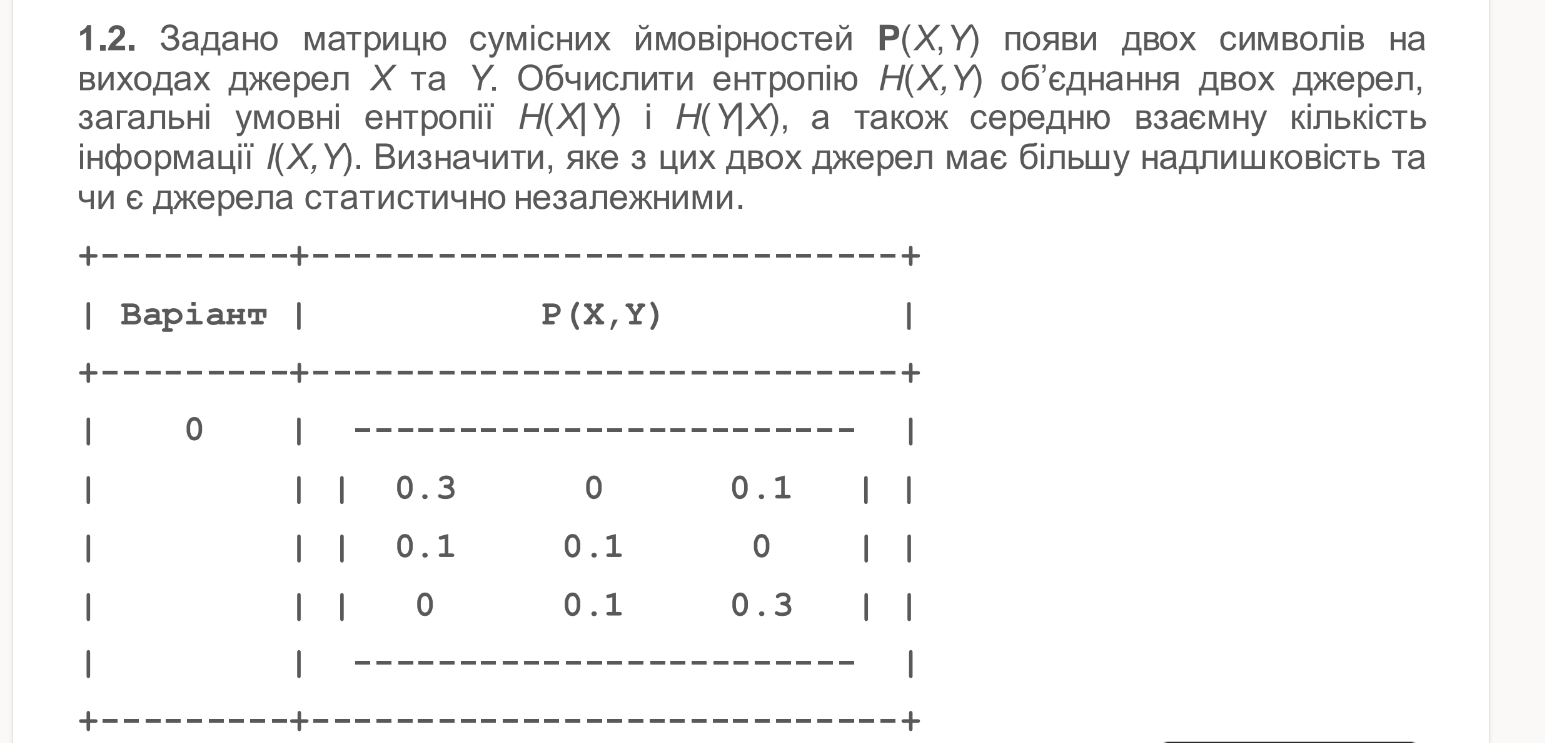

In [ ]:
def task_1_2(p_x_and_y):
  H_x_and_y = 0
  for i in range(len(p_x_and_y)):
    for j in range(len(p_x_and_y[0])):
      H_x_and_y += p_x_and_y[i][j] * math.log2(p_x_and_y[i][j]) if p_x_and_y[i][j] > 0 else 0
  H_x_and_y *= -1
  H_x_and_y = round(H_x_and_y,4)
  P_x = []
  for i in range(len(p_x_and_y)):
    P_x.append(sum(p_x_and_y[i]))

  P_Y = []
  for j in range(len(p_x_and_y[0])):
    curr = 0
    for i in range(len(p_x_and_y)):
      curr += p_x_and_y[i][j]
    P_Y.append(curr)

  H_x = H(P_x)
  H_y = H(P_Y)
  p_x = p(P_x) #Надлишковість
  p_y = p(P_Y) #Надлишковість

  I_x_and_y = round(H_x + H_y  - H_x_and_y,4) #Current status update
  H_y_after_x = round(H_x_and_y - H_x,4)
  H_x_after_y = round(H_x_and_y - H_y,4)
  print(H_y_after_x,H_x_after_y)
  if I_x_and_y != 0:
    print('Джерела статистично залежні')
  else:
    print('Джерела статистично незалежні')
  res = pd.DataFrame({
      'H(X,Y)': [H_x_and_y],
      'H(X\Y)': [H_x_after_y],
      'H(Y\X)': [H_y_after_x],
      'I(X,Y)': [I_x_and_y],
      'H(X)': [H_x],
      'p(X)': [p_x],
      'H(Y)': [H_y],
      'p(Y)': [p_y]
  })

  return res



p_x_and_y = [[0.14,0.02,0.76],
            [0.0,0.01,0.01],
             [0.01,0.05,0.0]]
task_1_2(p_x_and_y)

0.7592 0.2339
Джерела статистично залежні


,"H(X,Y)",H(X\Y),H(Y\X),"I(X,Y)",H(X),p(X),H(Y),p(Y)
0,1.2263,0.2339,0.7592,0.2332,0.4671,0.7053,0.9924,0.3739


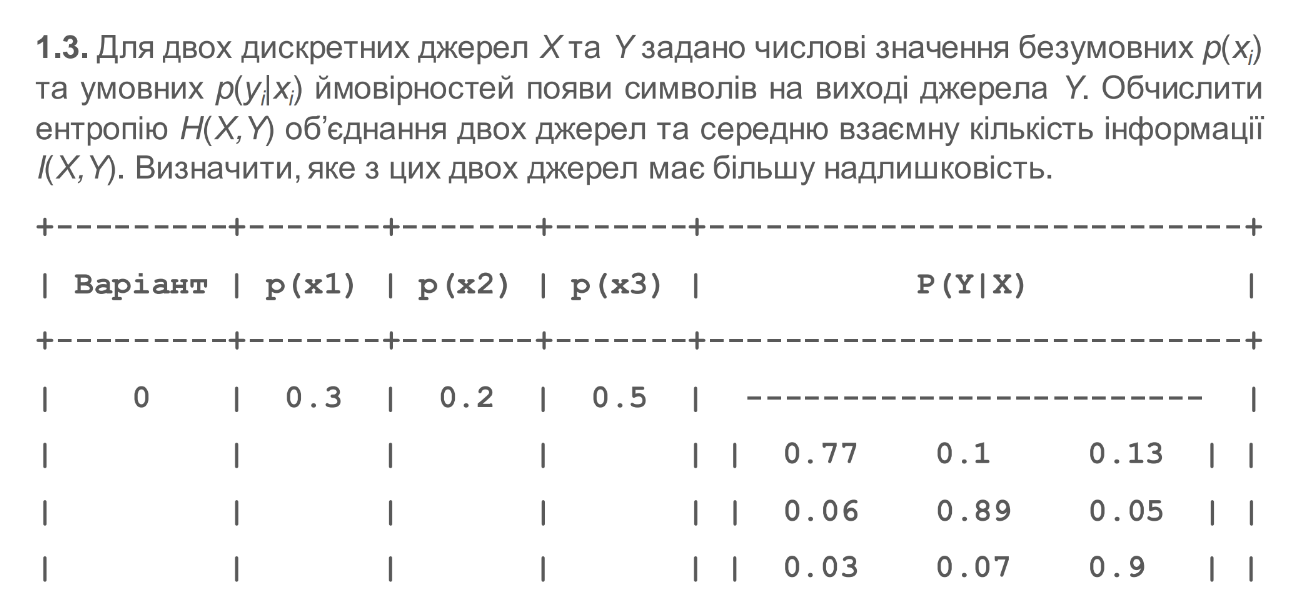

In [ ]:
def task_1_3(x: list, p_y_after_x: list):
  H_X = H(x)
  p_X = p(x)

  H_y_after_x_arr = []
  for i in range(len(p_y_after_x)):
    H_y_after_x_arr.append(H(p_y_after_x[i]))

  H_y_after_x = round(sum([x[i] * H_y_after_x_arr[i] for i in range(len(x))]),4)

  H_x_and_y = H_X + H_y_after_x


  p_x_and_y = [[0 for _ in range(len(p_y_after_x))] for _ in range(len(p_y_after_x))]
  for i in range(len(p_x_and_y)):
    for j in range(len(p_x_and_y[0])):
      p_x_and_y[i][j] =round( x[i] * p_y_after_x[i][j],4)

  P_Y = []
  for j in range(len(p_x_and_y[0])):
    curr = 0
    for i in range(len(p_x_and_y)):
      curr += p_x_and_y[i][j]
    P_Y.append(curr)

  H_Y = H(P_Y)

  H_x_after_y = round(H_x_and_y - H_Y,4)

  p_Y = p(P_Y)

  I_x_and_y = round(H_X + H_Y - H_x_and_y,4)

  res = pd.DataFrame({
      'H(X,Y)': [H_x_and_y],
      'H(X\Y)': [H_x_after_y],
      'H(Y\X)': [H_y_after_x],
      'I(X,Y)': [I_x_and_y],
      'H(X)': [H_X],
      'p(X)': [p_X],
      'H(Y)': [H_Y],
      'p(Y)': [p_Y]
  })
  for i in range(len(p_x_and_y)):
    print(p_x_and_y[i])
  return res


p_y_after_x = [[0.07,0.77,0.16],
              [0.82,0.05,0.13],
              [0.7,0.27,0.03]]
x = [0.01,0.01,0.98]
task_1_3(x,p_y_after_x)


[0.0007, 0.0077, 0.0016]
[0.0082, 0.0005, 0.0013]
[0.686, 0.2646, 0.0294]


,"H(X,Y)",H(X\Y),H(Y\X),"I(X,Y)",H(X),p(X),H(Y),p(Y)
0,1.1811,0.145,1.0197,0.0164,0.1614,0.8982,1.0361,0.3463
